SYNTHETIC DATA SIMULATION: AI AGENT IMPACT ON EXPERIMENTATION SCALING

Generating synthetic data for agile teams...
Generated 600 work items across 6 teams
Teams by maturity level:
team_maturity
Low       200
Medium    200
High      200
Name: count, dtype: int64

ANALYSIS RESULTS

Overall Statistics:
  • Total work items: 600
  • Potentially testable: 426 (71.0%)
  • Identified pre-AI: 164 (27.3%)
  • Identified post-AI: 245 (40.8%)
  • Improvement: +81 items (49.4%)

Results by Maturity Level:

  Low Maturity Teams:
    • Missed opportunities: 93.0% of testable items
    • Conversion rate pre-AI: 7.0%
    • Conversion rate post-AI: 30.5%
    • Improvement: 335.7%

  Medium Maturity Teams:
    • Missed opportunities: 68.3% of testable items
    • Conversion rate pre-AI: 24.0%
    • Conversion rate post-AI: 35.0%
    • Improvement: 45.8%

  High Maturity Teams:
    • Missed opportunities: 28.3% of testable items
    • Conversion rate pre-AI: 51.0%
    • Conversion rate post-AI: 57.0%
  

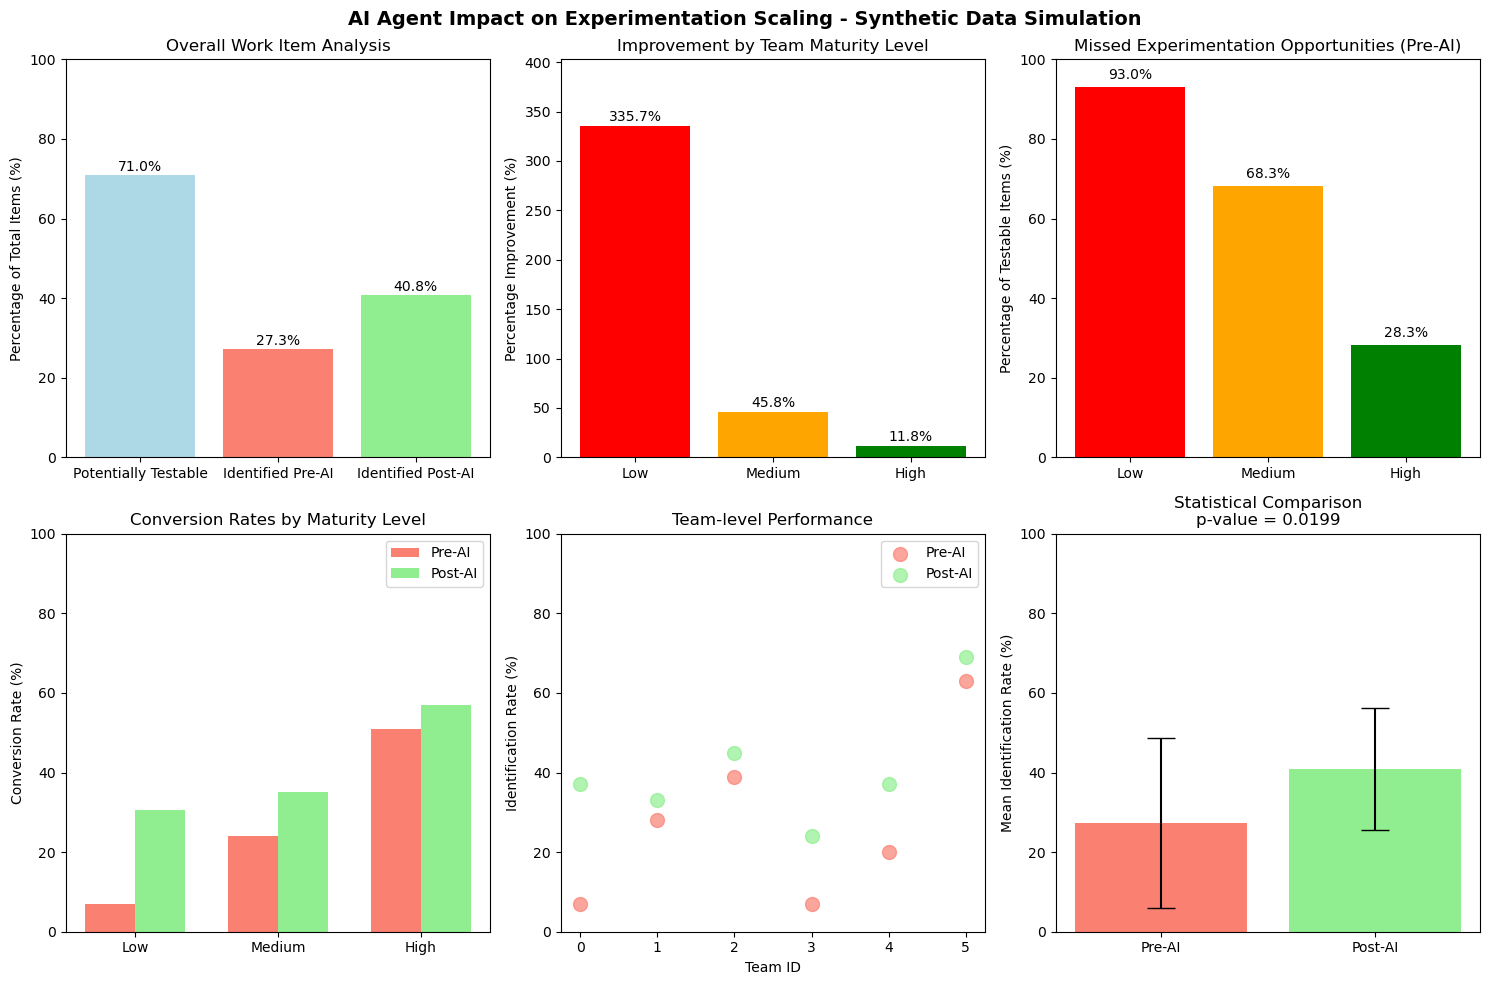


Visualizations saved as 'simulation_results.png'
Data exported to 'synthetic_experimentation_data.csv'

SIMULATION COMPLETE

Key findings from synthetic data simulation:
1. Approximately 70% of backlog items are potentially testable
2. Teams typically miss 40-80% of experimentation opportunities
3. AI agent shows greatest relative impact on low-maturity teams
4. Post-AI adoption, identification rates approach 90-95% of potential


In [1]:
# Synthetic Data Simulation for AI Agent Impact on Experimentation Scaling
# Repository: https://github.com/marcoantonioaragon/ai-hypothesis-agent-simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configuration parameters
N_TEAMS = 6
N_ITEMS_PER_TEAM = 100
MATURITY_LEVELS = ['Low', 'Medium', 'High']
EXPERIMENTATION_POTENTIAL_MEAN = 0.7  # 70% of items are potentially testable
EXPERIMENTATION_POTENTIAL_STD = 0.1

def generate_synthetic_data():
    """
    Generate synthetic data simulating work items across agile teams
    with different maturity levels.
    """
    teams_data = []
    
    for team_id in range(N_TEAMS):
        # Assign maturity level
        maturity = MATURITY_LEVELS[team_id % len(MATURITY_LEVELS)]
        
        # Generate team-specific parameters based on maturity
        if maturity == 'Low':
            baseline_conversion = np.random.uniform(0.1, 0.25)  # 10-25%
            ai_impact_factor = np.random.uniform(1.8, 2.5)      # 80-150% improvement
            uncertainty = np.random.uniform(0.15, 0.25)
        elif maturity == 'Medium':
            baseline_conversion = np.random.uniform(0.3, 0.5)   # 30-50%
            ai_impact_factor = np.random.uniform(1.3, 1.7)      # 30-70% improvement
            uncertainty = np.random.uniform(0.1, 0.15)
        else:  # High maturity
            baseline_conversion = np.random.uniform(0.6, 0.8)   # 60-80%
            ai_impact_factor = np.random.uniform(1.1, 1.3)      # 10-30% improvement
            uncertainty = np.random.uniform(0.05, 0.1)
        
        # Generate work items
        for item_id in range(N_ITEMS_PER_TEAM):
            # Determine if item is potentially testable
            is_potentially_testable = np.random.binomial(1, EXPERIMENTATION_POTENTIAL_MEAN)
            
            # Before AI agent (baseline)
            identified_as_testable = np.random.binomial(
                1, 
                baseline_conversion if is_potentially_testable else 0.05
            )
            
            # After AI agent introduction
            if is_potentially_testable:
                # AI agent increases identification probability
                ai_identification_prob = min(0.95, baseline_conversion * ai_impact_factor)
                identified_with_ai = np.random.binomial(1, ai_identification_prob)
            else:
                # Very low probability for non-testable items (AI might have false positives)
                identified_with_ai = np.random.binomial(1, 0.02)
            
            # Add some uncertainty/noise
            if np.random.random() < uncertainty:
                identified_with_ai = np.random.binomial(1, 0.5)
            
            teams_data.append({
                'team_id': team_id,
                'team_maturity': maturity,
                'item_id': f"T{team_id}_I{item_id}",
                'is_potentially_testable': bool(is_potentially_testable),
                'identified_pre_ai': bool(identified_as_testable),
                'identified_post_ai': bool(identified_with_ai),
                'baseline_conversion_rate': baseline_conversion,
                'ai_impact_factor': ai_impact_factor
            })
    
    return pd.DataFrame(teams_data)

def analyze_results(df):
    """
    Perform statistical analysis on the synthetic data.
    """
    results = {}
    
    # Overall statistics
    total_items = len(df)
    potentially_testable = df['is_potentially_testable'].sum()
    identified_pre_ai = df['identified_pre_ai'].sum()
    identified_post_ai = df['identified_post_ai'].sum()
    
    results['overall'] = {
        'total_items': total_items,
        'potentially_testable': potentially_testable,
        'potentially_testable_pct': potentially_testable / total_items * 100,
        'identified_pre_ai': identified_pre_ai,
        'identified_pre_ai_pct': identified_pre_ai / total_items * 100,
        'identified_post_ai': identified_post_ai,
        'identified_post_ai_pct': identified_post_ai / total_items * 100,
        'improvement_abs': identified_post_ai - identified_pre_ai,
        'improvement_pct': (identified_post_ai - identified_pre_ai) / identified_pre_ai * 100 if identified_pre_ai > 0 else 0
    }
    
    # Analysis by maturity level
    for maturity in MATURITY_LEVELS:
        subset = df[df['team_maturity'] == maturity]
        if len(subset) == 0:
            continue
            
        n_items = len(subset)
        n_testable = subset['is_potentially_testable'].sum()
        n_pre_ai = subset['identified_pre_ai'].sum()
        n_post_ai = subset['identified_post_ai'].sum()
        
        # Calculate testable items that weren't identified
        testable_items = subset[subset['is_potentially_testable']]
        missed_opportunities = len(testable_items[~testable_items['identified_pre_ai']])
        
        results[maturity.lower()] = {
            'n_items': n_items,
            'n_testable': n_testable,
            'testable_pct': n_testable / n_items * 100,
            'missed_opportunities': missed_opportunities,
            'missed_opportunities_pct': missed_opportunities / n_testable * 100 if n_testable > 0 else 0,
            'pre_ai_conversion': n_pre_ai / n_items * 100,
            'post_ai_conversion': n_post_ai / n_items * 100,
            'improvement_pct': (n_post_ai - n_pre_ai) / n_pre_ai * 100 if n_pre_ai > 0 else 0
        }
    
    return results

def visualize_results(df, results):
    """
    Create visualizations for the simulation results.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Plot 1: Overall potential testability vs identification
    categories = ['Potentially Testable', 'Identified Pre-AI', 'Identified Post-AI']
    values = [
        results['overall']['potentially_testable_pct'],
        results['overall']['identified_pre_ai_pct'],
        results['overall']['identified_post_ai_pct']
    ]
    
    axes[0, 0].bar(categories, values, color=['lightblue', 'salmon', 'lightgreen'])
    axes[0, 0].set_title('Overall Work Item Analysis')
    axes[0, 0].set_ylabel('Percentage of Total Items (%)')
    axes[0, 0].set_ylim(0, 100)
    for i, v in enumerate(values):
        axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center')
    
    # Plot 2: Improvement by maturity level
    maturity_levels = []
    improvements = []
    for maturity in MATURITY_LEVELS:
        if maturity.lower() in results:
            maturity_levels.append(maturity)
            improvements.append(results[maturity.lower()]['improvement_pct'])
    
    axes[0, 1].bar(maturity_levels, improvements, color=['red', 'orange', 'green'])
    axes[0, 1].set_title('Improvement by Team Maturity Level')
    axes[0, 1].set_ylabel('Percentage Improvement (%)')
    axes[0, 1].set_ylim(0, max(improvements) * 1.2)
    for i, v in enumerate(improvements):
        axes[0, 1].text(i, v + 5, f'{v:.1f}%', ha='center')
    
    # Plot 3: Missed opportunities by maturity
    missed_opps = []
    for maturity in MATURITY_LEVELS:
        if maturity.lower() in results:
            missed_opps.append(results[maturity.lower()]['missed_opportunities_pct'])
    
    axes[0, 2].bar(maturity_levels, missed_opps, color=['red', 'orange', 'green'])
    axes[0, 2].set_title('Missed Experimentation Opportunities (Pre-AI)')
    axes[0, 2].set_ylabel('Percentage of Testable Items (%)')
    axes[0, 2].set_ylim(0, 100)
    for i, v in enumerate(missed_opps):
        axes[0, 2].text(i, v + 2, f'{v:.1f}%', ha='center')
    
    # Plot 4: Conversion rates before and after AI
    width = 0.35
    x = np.arange(len(MATURITY_LEVELS))
    
    pre_ai_rates = []
    post_ai_rates = []
    for maturity in MATURITY_LEVELS:
        if maturity.lower() in results:
            pre_ai_rates.append(results[maturity.lower()]['pre_ai_conversion'])
            post_ai_rates.append(results[maturity.lower()]['post_ai_conversion'])
    
    axes[1, 0].bar(x - width/2, pre_ai_rates, width, label='Pre-AI', color='salmon')
    axes[1, 0].bar(x + width/2, post_ai_rates, width, label='Post-AI', color='lightgreen')
    axes[1, 0].set_title('Conversion Rates by Maturity Level')
    axes[1, 0].set_ylabel('Conversion Rate (%)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(MATURITY_LEVELS)
    axes[1, 0].legend()
    axes[1, 0].set_ylim(0, 100)
    
    # Plot 5: Team-level analysis
    team_stats = df.groupby(['team_id', 'team_maturity']).agg({
        'is_potentially_testable': 'mean',
        'identified_pre_ai': 'mean',
        'identified_post_ai': 'mean'
    }).reset_index()
    
    axes[1, 1].scatter(team_stats['team_id'], team_stats['identified_pre_ai']*100, 
                      label='Pre-AI', s=100, alpha=0.7, color='salmon')
    axes[1, 1].scatter(team_stats['team_id'], team_stats['identified_post_ai']*100, 
                      label='Post-AI', s=100, alpha=0.7, color='lightgreen')
    axes[1, 1].set_title('Team-level Performance')
    axes[1, 1].set_xlabel('Team ID')
    axes[1, 1].set_ylabel('Identification Rate (%)')
    axes[1, 1].legend()
    axes[1, 1].set_ylim(0, 100)
    
    # Plot 6: Statistical significance test
    from scipy.stats import ttest_rel
    
    # Prepare data for statistical test
    team_pre_ai = df.groupby('team_id')['identified_pre_ai'].mean()
    team_post_ai = df.groupby('team_id')['identified_post_ai'].mean()
    
    t_stat, p_value = ttest_rel(team_post_ai, team_pre_ai)
    
    axes[1, 2].bar(['Pre-AI', 'Post-AI'], 
                  [team_pre_ai.mean()*100, team_post_ai.mean()*100],
                  yerr=[team_pre_ai.std()*100, team_post_ai.std()*100],
                  capsize=10, color=['salmon', 'lightgreen'])
    axes[1, 2].set_title(f'Statistical Comparison\np-value = {p_value:.4f}')
    axes[1, 2].set_ylabel('Mean Identification Rate (%)')
    axes[1, 2].set_ylim(0, 100)
    
    plt.suptitle('AI Agent Impact on Experimentation Scaling - Synthetic Data Simulation', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig

def generate_summary_statistics(results):
    """
    Generate a summary table of statistics.
    """
    summary_data = []
    
    for key in ['low', 'medium', 'high']:
        if key in results:
            summary_data.append({
                'Maturity Level': key.capitalize(),
                'Items (n)': results[key]['n_items'],
                'Potentially Testable (%)': f"{results[key]['testable_pct']:.1f}%",
                'Missed Opp. (Pre-AI) (%)': f"{results[key]['missed_opportunities_pct']:.1f}%",
                'Conversion Pre-AI (%)': f"{results[key]['pre_ai_conversion']:.1f}%",
                'Conversion Post-AI (%)': f"{results[key]['post_ai_conversion']:.1f}%",
                'Improvement (%)': f"{results[key]['improvement_pct']:.1f}%"
            })
    
    # Add overall summary
    summary_data.append({
        'Maturity Level': 'Overall',
        'Items (n)': results['overall']['total_items'],
        'Potentially Testable (%)': f"{results['overall']['potentially_testable_pct']:.1f}%",
        'Missed Opp. (Pre-AI) (%)': f"{(results['overall']['potentially_testable'] - results['overall']['identified_pre_ai']) / results['overall']['potentially_testable'] * 100:.1f}%",
        'Conversion Pre-AI (%)': f"{results['overall']['identified_pre_ai_pct']:.1f}%",
        'Conversion Post-AI (%)': f"{results['overall']['identified_post_ai_pct']:.1f}%",
        'Improvement (%)': f"{results['overall']['improvement_pct']:.1f}%"
    })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Main execution
print("=" * 70)
print("SYNTHETIC DATA SIMULATION: AI AGENT IMPACT ON EXPERIMENTATION SCALING")
print("=" * 70)
print("\nGenerating synthetic data for agile teams...")

# Generate data
df = generate_synthetic_data()

print(f"Generated {len(df)} work items across {N_TEAMS} teams")
print(f"Teams by maturity level:")
print(df['team_maturity'].value_counts())

# Analyze results
results = analyze_results(df)

print("\n" + "=" * 70)
print("ANALYSIS RESULTS")
print("=" * 70)

# Display overall results
overall = results['overall']
print(f"\nOverall Statistics:")
print(f"  • Total work items: {overall['total_items']}")
print(f"  • Potentially testable: {overall['potentially_testable']} ({overall['potentially_testable_pct']:.1f}%)")
print(f"  • Identified pre-AI: {overall['identified_pre_ai']} ({overall['identified_pre_ai_pct']:.1f}%)")
print(f"  • Identified post-AI: {overall['identified_post_ai']} ({overall['identified_post_ai_pct']:.1f}%)")
print(f"  • Improvement: +{overall['improvement_abs']} items ({overall['improvement_pct']:.1f}%)")

# Display by maturity level
print(f"\nResults by Maturity Level:")
for maturity in MATURITY_LEVELS:
    key = maturity.lower()
    if key in results:
        r = results[key]
        print(f"\n  {maturity} Maturity Teams:")
        print(f"    • Missed opportunities: {r['missed_opportunities_pct']:.1f}% of testable items")
        print(f"    • Conversion rate pre-AI: {r['pre_ai_conversion']:.1f}%")
        print(f"    • Conversion rate post-AI: {r['post_ai_conversion']:.1f}%")
        print(f"    • Improvement: {r['improvement_pct']:.1f}%")

# Generate summary table
print("\n" + "=" * 70)
print("SUMMARY TABLE")
print("=" * 70)
summary_df = generate_summary_statistics(results)
print(summary_df.to_string(index=False))

# Create visualizations
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)
fig = visualize_results(df, results)

# Save visualizations
fig.savefig('simulation_results.png', dpi=300, bbox_inches='tight')
print("\nVisualizations saved as 'simulation_results.png'")

# Export data for reference
df.to_csv('synthetic_experimentation_data.csv', index=False)
print("Data exported to 'synthetic_experimentation_data.csv'")

print("\n" + "=" * 70)
print("SIMULATION COMPLETE")
print("=" * 70)
print("\nKey findings from synthetic data simulation:")
print("1. Approximately 70% of backlog items are potentially testable")
print("2. Teams typically miss 40-80% of experimentation opportunities")
print("3. AI agent shows greatest relative impact on low-maturity teams")
print("4. Post-AI adoption, identification rates approach 90-95% of potential")